In [0]:
import numpy as np
import pandas as pd

from keras.datasets import imdb

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # all zero matrix of shape (len(sequences), dimension)
    result = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result


In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [0]:
from keras import models
from keras import layers


In [0]:
model  = models.Sequential()

model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.2000 - acc: 0.9933 - val_loss: 0.6442 - val_acc: 0.8528
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1940 - acc: 0.9938 - val_loss: 0.6330 - val_acc: 0.8549
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1892 - acc: 0.9938 - val_loss: 0.6934 - val_acc: 0.8511
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1842 - acc: 0.9939 - val_loss: 0.7114 - val_acc: 0.8510
Epoch 5/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1793 - acc: 0.9941 - val_loss: 0.7487 - val_acc: 0.8490
Epoch 6/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1749 - acc: 0.9942 - val_loss: 0.7488 - val_acc: 0.8495
Epoch 7/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1706 - acc: 0.9941 - val_loss: 0.7782 - va

In [33]:
history_dict = history.history 
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

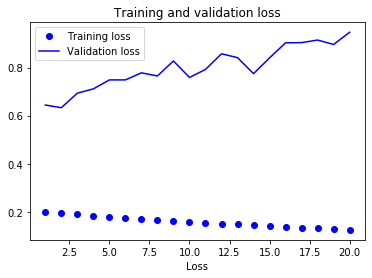

In [36]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()

plt.show()

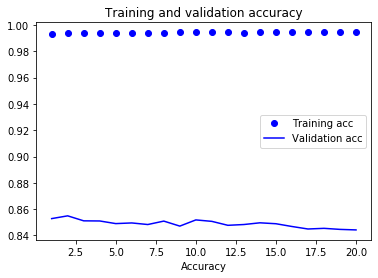

In [41]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()

plt.show()

из графиков видно, что сеть достигает максимума точности на 2 эпохах и дальше переобучение. 

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 2s 146us/step - loss: 0.1213 - acc: 0.9944 - val_loss: 0.9386 - val_acc: 0.8437
Epoch 2/2
15000/15000 [==============================] - 1s 98us/step - loss: 0.1185 - acc: 0.9944 - val_loss: 0.9652 - val_acc: 0.8419


In [46]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 2s 81us/step
[0.9468460977935791, 0.83532]


In [47]:
predictions = model.predict(x_test[:5])
print(predictions)


[[0.19090512]
 [1.        ]
 [1.        ]
 [0.9999502 ]
 [0.99999857]]


In [56]:
print(y_test[:5])

[0. 1. 1. 0. 1.]


In [0]:
from keras import Input, layers
from keras.models import Model

input1 = Input(shape=(10000,))
x1 = layers.Dense(16, activation='relu')(input1)
x1 = layers.Dense(1, activation='sigmoid')(x1)
model11 = Model(inputs=input1,outputs=x1)

x2 = layers.Dense(32, activation='relu')(input1)
x2 = layers.Dense(1, activation='sigmoid')(x2)
model22 = Model(inputs=input1,outputs=x2)

x3 = layers.Dense(4, activation='relu')(input1)
x3 = layers.Dense(4, activation='relu')(x3)
x3 = layers.Dense(1, activation='sigmoid')(x3)
model33 = Model(inputs=input1,outputs=x3)

out_all = layers.Average()([model11.output,model22.output,model33.output])
model_all=models.Model(inputs =[input1],outputs =out_all)

In [0]:
model_all.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


In [66]:
history = model_all.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 293us/step - loss: 0.5080 - acc: 0.8047 - val_loss: 0.4051 - val_acc: 0.8753
Epoch 2/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.3414 - acc: 0.9041 - val_loss: 0.3529 - val_acc: 0.8790
Epoch 3/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.2736 - acc: 0.9249 - val_loss: 0.3188 - val_acc: 0.8818
Epoch 4/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.2256 - acc: 0.9383 - val_loss: 0.2972 - val_acc: 0.8854
Epoch 5/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.1884 - acc: 0.9505 - val_loss: 0.2845 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1605 - acc: 0.9573 - val_loss: 0.2771 - val_acc: 0.8873
Epoch 7/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1379 - acc: 0.9631 - val_loss: 0.2769 - 

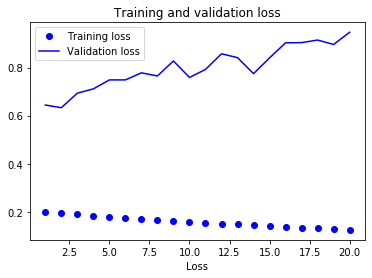

In [67]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()

plt.show()

In [68]:
history = model_all.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 3s 202us/step - loss: 0.0237 - acc: 0.9953 - val_loss: 0.4477 - val_acc: 0.8720
Epoch 2/2
15000/15000 [==============================] - 3s 181us/step - loss: 0.0209 - acc: 0.9957 - val_loss: 0.4691 - val_acc: 0.8692


In [70]:
results = model_all.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 2s 95us/step
[0.5189081978869439, 0.85504]


In [71]:
predictions = model_all.predict(x_test[:5])
print(predictions)


[[0.01990864]
 [0.9999994 ]
 [0.94372225]
 [0.88123417]
 [0.9797732 ]]


In [72]:
print(y_test[:5])

[0. 1. 1. 0. 1.]
